In [1]:
!pip install bayesian-optimization

In [2]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
from bayes_opt import BayesianOptimization

%matplotlib inline
sns.set()

In [3]:
%cd ..

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis


In [4]:
cd data\processed

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis\data\processed


In [5]:
df = pd.read_csv('3.0 Processed Data with Dummy Variables.csv', index_col = 'Unnamed: 0')
pd.set_option('display.max_columns',275)
df.head()

,Survey_ID,Age,Education_Completed,Household_Size,No_One,Spouse,Children,Grand_Children,Parent,Grandparent,Brother/Sister,Other_Relative,Friends,Other,Full_Time_Employment,Part_Time_Employment,Self_Employed_Full_Time,Self_Employed_Part_Time,Student,Homemaker,Disabled,Unemployed,Retired,Other_Employement,Income,Achieving_Ends_Meet,US_Born,Duration_of_Residency,Primary_Language,English_Speaking,English_Difficulties,Familiarity_with_America,Familiarity_with_Ethnic_Origin,Identify_Ethnically,Belonging,Discrimination,Present_Health,Present_Mental_Health,Present_Oral_Health,Hygiene_Assistance,Smoking,Drinking,Regular_Exercise,Healthy_Diet,Hypertension,Diabetes,Arthritis,Physical_Check-up,Dentist_Check-up,Urgentcare,Folkmedicine,Primary_Care,Health_Insurance,Dental_Insurance,Unmet_Health_Need,Unmet_Dental_Needs,Transportation_(Medical),Interpretation_(Medical),Communication_Problem,Counseling_Ethnic_Preference,Users,Satisfaction,Family,Close_Friend,Acquaintances,Heal_Professionals,Mobile_Apps,Email,Social_Networks,Online_Communities,Health_Website,Other.1,Quality_of_Life,Satisfied_With_Life_1,Satisfied_With_Life_2,Psychiatrist,General_Practitioner,Therapist/Counselor,Religious_Leader,Weakness,Shame,Disappointment,Disclosure,Antidepressants,Danger,Recovery,Treatment,Counseling,Medical_Ethnic_Preference,Knowledge,Diagnosed,Concern_for_Self_(AD),Concern_for_Others_(AD),Prevention,Plan_(AD),Education_(AD),Services_(AD),Language_Barrier_(AD),Fate_(AD),Aging_(AD),Embarrassing_(AD),Avoidance_(AD),Cure_(AD),Nursing_Home_(AD),Advanced_Directives,Have_an_Advanced_Directive,Superstition,See_Family,Close_Family,Helpful_Family,See_Friends,Close_Friends,Helpful_Friends,Family_Respect,Similar_Values,Successful_Family,Trust,Loyalty,Family_Pride,Expression,Spend_Time_Together,Feel_Close,Togetherness,Religious_Importance,Close-knit_Community,Helpful_Community,Community_Shares_Values,Get_Along,Community_Trust,Residency,Place_to_Live,Raising_Children,Place_to_Work,Small_Businesses,Place_to_Retire,Arts_and_Culture,Safety,Traffic,Austin_Quality_of_Life,Quality_of_Service,Parks_and_Recs,Libraries,Public_Safety,Airport,Austin_Energy,Court,Social_Services,Aware_of_AARC,Visit_Frequency,Activities,EMS_Classes,Fire_Alarm,Public_Computer,Library_Internet_Acess,Literature,Citizenship_Class,Small_Business,English_Classes,9-1-1,3-1-1,APD_Languages,District,Satisfaction_With_Housing.,Nursing_Home,Smoke_Detector,Recycle,Compost,Public_Transportation,Bicycling,Carpooling,Personal_Car,Car_Share,Walking,Other_Transportation,Access_to_a_Computer,Mobile_Devices,Home_Phone,Public_Meeting,Council_Meeting,Contact_City_Official,City_Election,Focus_Group,City_Effort_Satisfaction,Paper_(City-based),TV/Radio_(City-based),Website_(City-based),Social_Networks_(City-based),People_(City-based),Other_(City-based),Paper_(Non-city-based_Ethnic),TV/Radio_(Non-city-based_Ethnic),Website_(Non-city-based_Ethnic),Social_Networks_(Non-city-based_Ethnic),People_(Non-city-based_Ethnic),Other_(Non-city-based_Ethnic),Paper_(Non-city-based_General),TV/Radio_(Non-city-based_General),Website_(Non-city-based_General),Social_Networks_(Non-city-based_General),People_(Non-city-based_General),Other_(Non-city-based_General),Satisfaction_Score,Gender_Female,Gender_Male,Ethnicity_Asian Indian,Ethnicity_Chinese,Ethnicity_Filipino,Ethnicity_Korean,Ethnicity_Other,Ethnicity_Vietnamese,Marital_Status_Living with a partner,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Religion_Buddhist,Religion_Catholic,Religion_Hindu,Religion_Muslim,Religion_None,Religion_Other,Religion_Protestant,Occupation_0,Occupation_Business owner,"Occupation_Clerical, office, sales","Occupation_Manager, executive, or official",Occupation_Other,Occupation_Professional,Occupation_Semi-skilled,Occupation_Service worker,Occupation_Skilled trades,Language_Chinese Simplified,Language_Chinese Traditional,Language_Eng_Chinese only,Language_English,Language_Gujarati,Language_Hindi,Language_Korean,Language_Tagalog,Language_Viet

In [6]:
y = df['Satisfaction_Score']
x = df.drop(['Survey_ID','Satisfaction_Score', 'Quality_of_Life','Satisfied_With_Life_1','Satisfied_With_Life_2'],axis=1)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [8]:
#from IPython.display import Audio
#sound_file = 'http://www.soundjay.com/button/beep-07.wav'
#Audio(sound_file, autoplay=True)

In [9]:
begin_time = datetime.datetime.now()
from sklearn import metrics
param_grid = {
    'learning_rate': [0.1, 0.25, 0.5, 0.75],
    'n_estimators': np.arange(10,70,20),
    'max_depth': np.arange(5,115,20),
    'min_samples_split': np.arange(2,127,25)}
def gb_fit(learning_rate, n_estimators, max_depth, min_samples_split):
    gb = GradientBoostingClassifier(
        learning_rate = float(learning_rate), 
        n_estimators = int(n_estimators), 
        max_depth = int(max_depth),
        min_samples_split = int(min_samples_split),
        random_state=42, 
        verbose=1)
    train_gb = gb.fit(x_train,y_train)
    y_pred = train_gb.predict(x_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    return rmse

In [10]:
gbBO = BayesianOptimization(gb_fit, {
    'learning_rate': (0.1, 0.75),
    'n_estimators': (10,70),
    'max_depth': (5,105),
    'min_samples_split': (2,102)})
gbBO.maximize(n_iter=45, init_points=4)

|   iter    |  target   | learni... | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------------------
      Iter       Train Loss   Remaining Time 
         1        4399.4340           14.76s
         2 23717644352363.0898           19.84s
         3 1740902261811211275014989999971429411096622103886527784444108048366731001856.0000           21.87s
         4 128397366832259154657312688157458527196237251788721830210218562778922137177456738466199635540220241459792342253447968555872795772909036639993622167552.0000           21.33s
         5 128398192368319810318417295270196799211630811224552581459451849597315930557803513969505052882108509621596712155729383859531020411222129788104359280640.0000           19.85s
         6 128398192368319810318417295270196799211630811224552581459451849597315930557803513969505052882108509621596712155729383859531020411222129788104359280640.0000           18.05s
         7 1284058698911656567693137627054876381782

         2        6689.3996           20.87s
         3        6417.7126           20.06s
         4        6171.8907           19.42s
         5        5964.2535           18.77s
         6        5778.8220           18.10s
         7        5592.6125           17.57s
         8        5440.6648           16.95s
         9        5285.9801           16.39s
        10        5138.9555           15.79s
        20        4102.0461           10.02s
        30        3474.4170            4.42s
|  6        |  4.027    |  0.116    |  5.295    |  62.38    |  38.73    |
      Iter       Train Loss   Remaining Time 
         1        5316.6697           28.93s
         2 72221349656957.1094           28.93s
         3 72221349676848.6094           27.95s
         4 3766778373257156271856487815269366848244548845897097507815395356646682845187587881992368842687789613403078656.0000           27.09s
         5 158850339050299516078262246722037302630512770678602959562375701316161584475886260789093744

         7 1536464887843897644623050695524096819959946609155113851781883339053281958430461626183754479551800752077686195845049071807238500550977530101760.0000           54.07s
         8 1538526456520845486159033127641048925338141288709491950435587887587880532168937990965444738354252986904935694688994995059441403786560419135488.0000           52.46s
         9 450103973349640045319020109518242120382861238119661072271148393524005961599631095712549406813624069663113385996517199332046155807276397586546688.0000           50.12s
        10 450103975950430732058294478094889343694709620180953159903197622279915875927135509750482132520140382344054681086585711517297524604509772190842880.0000           47.32s
        20 248682537302799192074601677048055099766306614818050610255474748727968516465239577886901266387799075881166896170889329179560351735501066179670322446336.0000           21.53s
        30 2486825373027991920746016770480550997663066148180506102554747487279685164652395778869012663877990

         1        4592.3899           26.89s
         2 111143094037.0657           33.61s
         3 111153572802.7789           35.48s
         4 111480923857.3016           36.46s
         5 2038716748055715888644962950996054229073406062266350953794780285388066197029034615016118076215252613917991433976938496.0000           36.30s
         6 2038716748055715888644962950996054229073406062266350953794780285388066197029034615016118076215252613917991433976938496.0000           36.25s
         7 2038716748055715888644962950996054229073406062266350953794780285388066197029034615016118076215252613917991433976938496.0000           35.88s
         8 2038716748055715888644962950996054229073406062266350953794780285388066197029034615016118076215252613917991433976938496.0000           35.33s
         9 33306812022525545432882143987390197329353704159363346489139125519920820355352747731864532421491571466916318813661455061174525624320.0000           34.72s
        10 333068120225255454328821439873901

        10 33037956439896841167656536219326457300222732181711823291978163912272663667078364542369372255412115118374610507091187457619958366234123427554674081792.0000            6.39s
|  21       |  4.934    |  0.5727   |  101.7    |  98.31    |  14.06    |
      Iter       Train Loss   Remaining Time 
         1        3305.2164            1.30m
         2        2505.9207            2.01m
         3        1942.8688            2.22m
         4        1558.1864            2.29m
         5        1267.6420            2.32m
         6        1037.9589            2.32m
         7         853.4836            2.32m
         8         704.5582            2.30m
         9         582.9043            2.29m
        10         483.1806            2.26m
        20          76.7811            1.90m
        30          12.3966            1.53m
        40           2.0129            1.13m
        50           0.3279           43.21s
        60           0.0538           17.92s
|  22       |  4.291  

        10 33825815261106441554754352867550038549467002553500848984566583856840940837515752075961705527859385709105346539414177819142367920547803323957248.0000           43.03s
        20 13379444651887605596079134904509132283826009584067890840200363846309759653323088935489928473987503381308556279794945187848854120660736042176687898624.0000           25.53s
        30 13379444651887605596079134904509132283826009584067890840200363846309759653323088935489928473987503381308556279794945187848854120660736042176687898624.0000            7.65s
|  27       |  5.578    |  0.4406   |  88.36    |  58.84    |  35.68    |
      Iter       Train Loss   Remaining Time 
         1          55.6953           58.01s
         2          18.9595            1.69m
         3           6.5418            1.91m
         4           2.2668            2.01m
         5           0.7866            2.03m
         6           0.2731            2.04m
         7           0.0948            2.07m
         8           0

         1        4403.0740           46.27s
         2  1402969142.8804            1.03m
         3  1402968592.6606            1.08m
         4  1403461725.2731            1.11m
         5  1403461280.4966            1.10m
         6  1403460966.1910            1.09m
         7  1403460714.7174            1.06m
         8  1403460502.1831            1.04m
         9  1403460364.0990            1.03m
        10  1403460219.1566            1.00m
        20 5355037192420.5098           47.34s
        30 453443874527356233345196433894894689658169002584902244475203443420798265014561293771735040.0000           34.59s
        40 14417434662827405420887052067818647299759564935172407351695261751657108932046563772209797471112226408492470774732472800511516814304894547308257061371904.0000           19.24s
        50 14477658379594744595653735061394512738934367278330734980345296744742331696815552850686313526268001579923569437695856831061104154521685031908508925165568.0000            1.62s
|  33  

|  39       |  5.01     |  0.5461   |  103.6    |  85.13    |  25.91    |
      Iter       Train Loss   Remaining Time 
         1        4905.0170           19.13s
         2  3567263839.2261           18.64s
         3 3170697374488432805852298933502540913836032.0000           18.01s
         4 4212198945691202582210177744947271910293504.0000           17.26s
         5 29500478811526451038416707688584955600079188033729939652676507189407496648676377271045703832186812826820451291627848635677372119406084096.0000           16.54s
         6 29500478811526451038416707688584955600079188033729939652676507189407496648676377271045703832186812826820451291627848635677372119406084096.0000           15.75s
         7 29500478811526451038416707688584955600079188033729939652676507189407496648676377271045703832186812826820451291627848635677372119406084096.0000           14.96s
         8 2950047881152645103841670768858495560007918803372993965267650718940749664867637727104570383218681282682045129162

         1        4686.9790           45.73s
         2 6362621842368.8115           53.76s
         3 657813450231843795025572921344.0000           56.51s
         4 621862484302371854467251431649616326664545521023345238716257125973542879064889173908721633316202173069324268419978306089123840.0000           57.90s
         5 621862484302371854467251431649616326664545521023345238716257125973542879064889173908721633316202173069324268419978306089123840.0000           58.51s
         6 621862484302371854467251431649616326664545521023345238716257125973542879064889173908721633316202173069324268419978306089123840.0000           59.43s
         7 621862484302371854467251431649616326664545521023345238716257125973542879064889173908721633316202173069324268419978306089123840.0000            1.00m
         8 499015331780163261685402369208103531700577084317890950536468921687097207665326824110793434354370970948316892866638397608401988499800064.0000            1.02m
         9 499015331780163261685402

        20 6957947387654646116774561782404545746661277684258082206193624244514592405507471256408965670308455452924141881751577577201453979712437464202215424.0000           15.24s
        30 6957947387654646116774561782404545746661277684258082206193624244514592405507471256408965670308455452924141881751577577201453979712437464202215424.0000            7.22s
|  48       |  4.189    |  0.1087   |  8.63     |  70.41    |  39.07    |
      Iter       Train Loss   Remaining Time 
         1        3614.6741           50.15s
         2 13348312760632.6211            1.25m
         3 13348314635655.9180            1.37m
         4 7814338127829338685440.0000            1.39m
         5 7814338127829338685440.0000            1.37m
         6 7814338127829338685440.0000            1.35m
         7 7814338129113758302208.0000            1.33m
         8 13089336898281696348774659796397593816682692706953010668418968206178528986537526177636442732533923337353019625301400272663061710503936.0000       

In [11]:
gbBO.max
#Audio(sound_file, autoplay=True)

{'target': 8.55520723777198,
 'params': {'learning_rate': 0.5243565230708638,
  'max_depth': 7.503831464490935,
  'min_samples_split': 21.32711983375067,
  'n_estimators': 27.189572268065913}}

In [12]:
test_params = gbBO.max['params']
test_params['max_depth'] = int(round(test_params['max_depth'],0))
test_params['min_samples_split'] = int(round(test_params['min_samples_split'],0))
test_params['n_estimators'] = int(round(test_params['n_estimators'],0))

In [13]:
test_gb = GradientBoostingClassifier(random_state=42, 
                                verbose=1, 
                                **test_params)
test_gb.fit(x_train,y_train)
y_pred = test_gb.predict(x_test)
wall_clock = datetime.datetime.now() - begin_time

      Iter       Train Loss   Remaining Time 
         1        4563.5141           20.55s
         2 4860036826440084993455576580096.0000           20.85s
         3 5183731681173661406352799432704.0000           20.12s
         4 84187643338436706133402609002705208736911194006330724083287094899700211310669777737586362245405595064190922958801657429212344166327681378553174163456.0000           19.38s
         5 84187643338436706133402609002705208736911194006330724083287094899700211310669777737586362245405595064190922958801657429212344166327681378553174163456.0000           18.50s
         6 84187643338436706133402609002705208736911194006330724083287094899700211310669777737586362245405595064190922958801657429212344166327681378553174163456.0000           17.67s
         7 5134776923231794208692590746745579133252296298276482026317144345391030481013269807282497429484476488171788675896928037667350960020778402597625202212864.0000           16.81s
         8 5134389201712375961312800149266668

In [14]:
print(x_test.shape, np.shape(y_pred))

(522, 247) (522,)


In [15]:
from sklearn import metrics
print('RMSE: {} \n MAE: {}'.format(
    np.sqrt(metrics.mean_squared_error(y_test,y_pred)), 
    metrics.mean_absolute_error(y_test, y_pred)))

RMSE: 7.348990599752393 
 MAE: 6.157088122605364


In [16]:
cd ..\..\models

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis\models


30


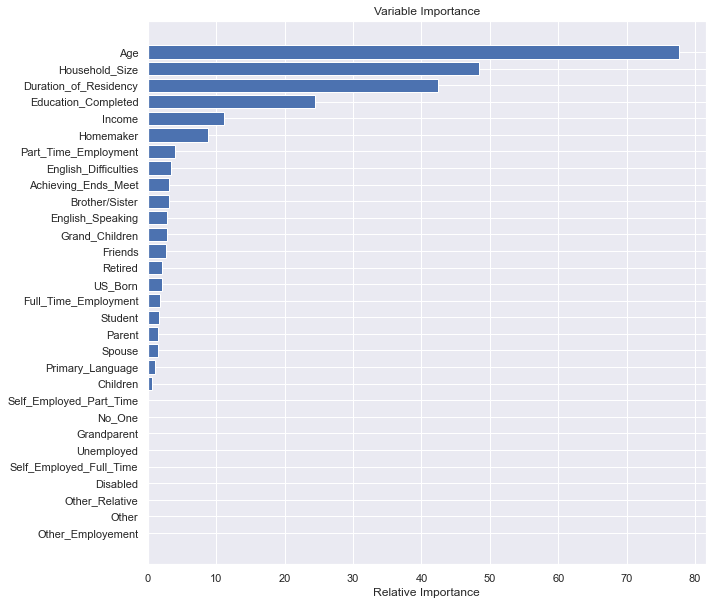

In [17]:
feature_importance = test_gb.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
f1 = plt.gcf()
plt.show()
f1.savefig('Feature Importance - model 4.0.3 - trial 2- Scaled Gradient Boosting with Bayesian Optimization.png')

In [18]:
import csv
model_name = 'Model 4.0.3 - Gradient Boosting with Bayesian Optimization'
values = [model_name,
          test_gb,
          np.sqrt(metrics.mean_squared_error(y_test,y_pred)),
          metrics.mean_absolute_error(y_test, y_pred), 
          wall_clock]
out = csv.writer(open("Model 4.0.3 Performance Metrics - trial 2.csv","w"), delimiter=',',quoting=csv.QUOTE_ALL)
out.writerow(values)

316